1 读取excel时，剔除某些行
2 pandas的时间序列处理

In [12]:
# 导入
import pandas as pd
from matplotlib import  pyplot as plt
from emotion_analyse import sentiment_score_list
from matplotlib import pyplot as plt

In [13]:
# 读取数据
stock_df = pd.read_excel("./TRD_Dalyr.xlsx",skiprows=[1,2])
print(stock_df.head())

    Stkcd       Trddt  Opnprc  Hiprc  Loprc  Clsprc  Ahshrtrd_D  Ahvaltrd_D  \
0  601099  2022-01-04    3.29   3.39   3.27    3.36           0           0   
1  601099  2022-01-05    3.35   3.37   3.31    3.34           0           0   
2  601099  2022-01-06    3.31   3.35   3.30    3.31           0           0   
3  601099  2022-01-07    3.32   3.36   3.31    3.31           0           0   
4  601099  2022-01-10    3.31   3.33   3.29    3.32           0           0   

   ChangeRatio  
0     0.024390  
1    -0.005952  
2    -0.008982  
3     0.000000  
4     0.003021  


/opt/anaconda/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


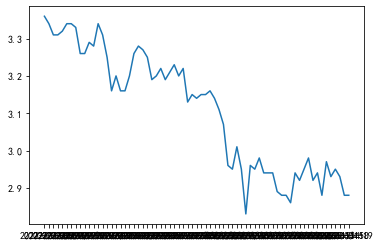

In [14]:
# 绘制图像
plt.plot(stock_df["Trddt"],stock_df["Clsprc"])
plt.show()

In [15]:
# 读出股票评论
comment_data = pd.read_excel("./share_comment.xlsx",usecols=[1,2])
comment_data.head()

,comment,date
0,看太平洋这孙子是股票市场的孙子,04-19 09:52
1,某润呢，某重组呢？[大笑][大笑][呲牙][呲牙],04-18 14:08
2,跌停板，我也不会卖,04-18 13:13
3,玩一天，就这样了,04-18 13:10
4,拉，天天亏,04-18 12:52


In [16]:
# 添加时间
comment_data["newdate"] = "2022-"+comment_data["date"]
comment_data.head()

,comment,date,newdate
0,看太平洋这孙子是股票市场的孙子,04-19 09:52,2022-04-19 09:52
1,某润呢，某重组呢？[大笑][大笑][呲牙][呲牙],04-18 14:08,2022-04-18 14:08
2,跌停板，我也不会卖,04-18 13:13,2022-04-18 13:13
3,玩一天，就这样了,04-18 13:10,2022-04-18 13:10
4,拉，天天亏,04-18 12:52,2022-04-18 12:52


In [17]:
# 转换为时间类型
comment_data["newdate"] = pd.to_datetime(comment_data["newdate"])
print(comment_data.head())

                     comment         date             newdate
0            看太平洋这孙子是股票市场的孙子  04-19 09:52 2022-04-19 09:52:00
1  某润呢，某重组呢？[大笑][大笑][呲牙][呲牙]  04-18 14:08 2022-04-18 14:08:00
2                  跌停板，我也不会卖  04-18 13:13 2022-04-18 13:13:00
3                   玩一天，就这样了  04-18 13:10 2022-04-18 13:10:00
4                      拉，天天亏  04-18 12:52 2022-04-18 12:52:00


In [18]:
# 情感值计算
print(comment_data.shape)
comment_data["sorce"] = comment_data["comment"].apply(lambda x:sentiment_score_list(x)[0])

(1520, 3)
积极 大笑
积极 大笑
消极 不会
消极 落下
消极 该死
积极 肯定
积极 最高
消极 不好
消极 不能
消极 完蛋
积极 安全
积极 开心
消极 没有
消极 没有
积极 心旷神怡
消极 牲畜
消极 绝望
消极 下跌
消极 下跌
消极 不会
积极 太好
积极 发展
积极 发展
积极 保证
积极 说明
消极 没有
积极 高兴
积极 赚钱
积极 指望
积极 赚钱
积极 自然
消极 过不去
消极 破碎
积极 哈哈
消极 痛苦
消极 麻木
积极 坚持
消极 不是
消极 判决
积极 经营
积极 时机
积极 管理
积极 促进
积极 发展
消极 压力
积极 赚钱
消极 垃圾
积极 兴奋
消极 垃圾
消极 垃圾
消极 破碎
积极 哈哈
消极 远离
消极 没有
消极 气死
消极 不是
积极 开心
积极 鼓励
积极 稳定
积极 稳定
积极 信心
积极 肯定
积极 喜欢
消极 下跌
消极 潜伏
消极 自卑
消极 破碎
积极 哈哈
消极 破碎
积极 哈哈
积极 大笑
积极 期待
消极 不要
积极 积极
消极 垃圾
消极 垃圾
消极 不会
消极 不了
消极 乏人问津
消极 差劲
消极 倾倒
消极 垃圾
消极 不足
积极 才能
消极 垃圾
消极 没有
消极 垃圾
消极 伤心
积极 答应
积极 便宜
积极 坚决
积极 接受
消极 反驳
积极 正确
消极 干扰
消极 压力
消极 不是
消极 不会
消极 不会
消极 报应
消极 恶有恶报
积极 变好
消极 没有
消极 垃圾
消极 不如
消极 垃圾
消极 垃圾
消极 想不到
消极 可恶
消极 可恶
消极 垃圾
消极 垃圾
积极 容易
积极  
积极 明白
消极 自卑
消极 碰壁
消极 自以为是
积极 才能
积极 必要
消极 质疑
消极 不管
积极 便宜
积极 便宜
消极 没有
消极 下降
消极 不了
积极 大笑
积极 大笑
积极 真正
消极 垃圾
积极 坚决
消极 不会
积极 肯定
积极 坚持
消极 没有
消极 爆发
积极 开心
消极 不能
积极 最高
积极 兴奋
积极 兴奋
积极 兴奋
消极 垃圾
消极 没有
消极 不会
积极 才能
积极 才能
积极 肯定
积极 哈哈
积极 知道
消极 垃圾
消极 不了
消极 进攻
消极 过不去
积极 情愿
积极 哈哈
积极 高兴
积极 高兴
消极 爆发
积极 胜利
消极 完蛋
积极 大笑
消极

In [19]:
comment_data.head()

,comment,date,newdate,sorce
0,看太平洋这孙子是股票市场的孙子,04-19 09:52,2022-04-19 09:52:00,0.0
1,某润呢，某重组呢？[大笑][大笑][呲牙][呲牙],04-18 14:08,2022-04-18 14:08:00,2.0
2,跌停板，我也不会卖,04-18 13:13,2022-04-18 13:13:00,-1.0
3,玩一天，就这样了,04-18 13:10,2022-04-18 13:10:00,0.0
4,拉，天天亏,04-18 12:52,2022-04-18 12:52:00,0.0


In [20]:
# 将newdate设置为索引
comment_data.set_index("newdate",inplace=True)
comment_data.head()

,comment,date,sorce
newdate,,,
2022-04-19 09:52:00,看太平洋这孙子是股票市场的孙子,04-19 09:52,0.0
2022-04-18 14:08:00,某润呢，某重组呢？[大笑][大笑][呲牙][呲牙],04-18 14:08,2.0
2022-04-18 13:13:00,跌停板，我也不会卖,04-18 13:13,-1.0
2022-04-18 13:10:00,玩一天，就这样了,04-18 13:10,0.0
2022-04-18 12:52:00,拉，天天亏,04-18 12:52,0.0


In [21]:
# 按到天重取样
data = comment_data.resample("D").count()["sorce"]

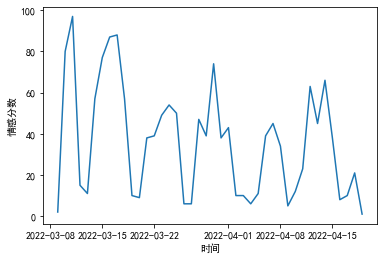

In [22]:
# 绘制出每天的情感值的变化情况
x = data.index
y = data.values
plt.plot(x,y)
plt.xlabel("时间")
plt.ylabel("情感分数")
plt.show()
